<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/MN2022_1_TallerMJWV_S04_r1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Taller MJWVS04

**Nombres:** 



**Email:**


**Curso:**
Metodos numericos 2022-1 MJ-WV

**Fecha:**
Viernes 2022-junio-17

**Fecha ultima Edicion:**



# Descripción

**Objetivos:**

Lectura de datos del plotXY de ATP.

Ejemplo para los archivos Monof_01.adf y Trif_01.adf que se deben cargar.


**Desarrollo**



1.   Lectura de archivos originales

   






# Importacion Modulos

In [ ]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.4.1
Version sympy:  1.7.1


# Lectura de archivos (open)

In [ ]:
#Funcion de lectura
def Leer_ADF01(fnombre):
    """fnombre: str nombre de archivo
       Lectura de datos de archivos ADF
       
       retorna un numpy.array con los datos numericos de las
       columnas y los nombres de las columnas.
       Numero de filas== columnas archivo
       Lista de str con nombre de las columnas

    """
    Datos = open(fnombre,"r")
    Datos.readline() #linea de informacion del archivo
    heads = Datos.readline() #Linea de nombre de columnas
    Titulos = heads.strip().split(" ")#separacion nombre de columnas
    Nc = len(Titulos) #numero de columnas

    Valores = []
    for q in Titulos:
      Valores.append([])##abre lista por cada columna
      
    for q in Datos:
      a= q.strip().split('\t')
      for k in range(Nc):
        Valores[k].append(float(a[k]))
    Datos.close()
    Valores = np.array(Valores)
        
    return Valores,Titulos


In [ ]:
#grafico de datos
fnombre1 ="Monof_01.adf"
DD1,DD2 = Leer_ADF01(fnombre1)
print("Filas: ",DD2)
print("Datos: ",DD1.shape)


Filas:  ['t', 'vVs', 'iXx0001Va']
Datos:  (3, 1001)


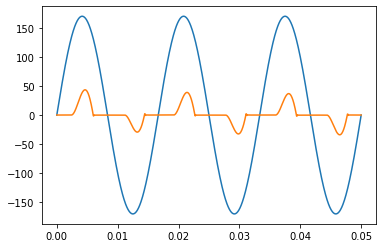

In [ ]:
Tiempo = DD1[0,:]
Volts = DD1[1,:]
Corriente = DD1[2,:]

plt.plot(Tiempo,Volts)
plt.plot(Tiempo, Corriente)


In [ ]:
#grafico de datos
fnombre1 ="Trif_01.adf"
DD3,DD4 = Leer_ADF01(fnombre1)
print("Columnas: ",DD4)
print("Datos: ",DD3.shape)

Columnas:  ['t', 'vVda', 'vVdb', 'vVdc', 'iVsaVda', 'iVsbVdb', 'iVscVdc']
Datos:  (7, 1751)


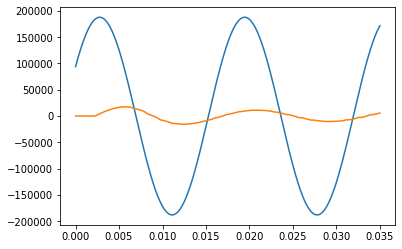

In [ ]:
T3 = DD3[0,:] #instantes de tiempo
V_fa = DD3[1,:] #voltraje en fase a
I_fa = DD3[4,:] #corriente en fase a

plt.plot(T3,V_fa,T3,I_fa*10)

# Lectura pandas

In [ ]:
#Import Libraries
import pandas as pd


#lectura de datos
dataset = pd.read_csv("Monof_01.adf",sep="\t", skiprows=2)


In [ ]:
dataset.head()

,0,1.03915e-14,0.0639767,Unnamed: 3
0,0.00005,3.19869,0.063981,NaN
1,0.00010,6.39624,0.063963,NaN
2,0.00015,9.59151,0.063922,NaN
3,0.00020,12.78340,0.063857,NaN
4,0.00025,15.97070,0.063770,NaN


In [ ]:
print(dataset.shape)
print(dataset.dtypes)
print(dataset.columns)


(1000, 4)
0              float64
1.03915e-14    float64
0.0639767      float64
Unnamed: 3     float64
dtype: object
Index(['0', '1.03915e-14', '0.0639767', 'Unnamed: 3'], dtype='object')


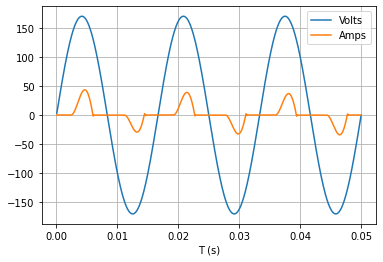

In [ ]:
Time = dataset["0"]
V_t = dataset["1.03915e-14"]
I_t = dataset['0.0639767']

plt.plot(Time,V_t)
plt.plot(Time, I_t)
plt.grid("on")
plt.xlabel("T (s)")
plt.legend(["Volts","Amps"])

# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)

[Kiusallas- NM with python ](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/ESazTK0AHE5Pta-KrZ69VbUBds8rV7zE3pGtjjHiAO7-ig?e=07PVfI)